In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from collections import Counter, defaultdict, namedtuple
import itertools
import networkx as nx
from IPython.display import display
import sympy as sp

In [2]:
import cooccur_saved
from tree_extraction import Aho
from compute_pam import compute_combo_tensor, compute_combo_tensor_pam, get_alpha
import example_graphs
from utils import nice_tree_plot, niceprint

In [3]:
np.random.seed(1)

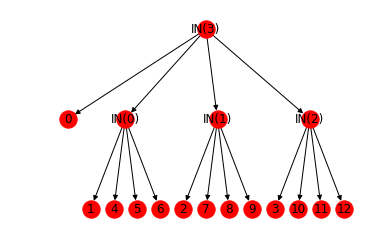

In [4]:
R = cooccur_saved.cooccur_true
C = Aho.get_ratio_matrix(R)
tree = Aho.extract(C, apply_ratio=False, threshold=0.0016)
nice_tree_plot(tree)

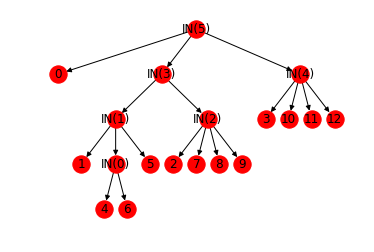

In [5]:
R = cooccur_saved.cooccur_empirical
C = Aho.get_ratio_matrix(R)
tree = Aho.extract(C, apply_ratio=False, threshold=0.0016)
nice_tree_plot(tree)

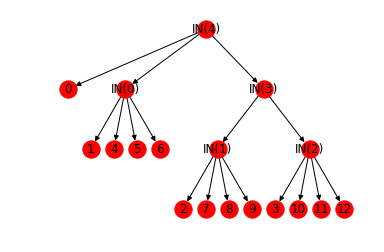

In [6]:
R = cooccur_saved.cooccur_estimated_lda
C = Aho.get_ratio_matrix(R)
tree = Aho.extract(C, apply_ratio=False, threshold=0.0016)
nice_tree_plot(tree)

In [7]:
def unique_off_diagonal(x, round_decimals = 10):
    vals = []
    for i in range(x.shape[0]):
        for j in range(i+1, x.shape[1]):
            vals.append(x[i,j])
    vals = np.round(np.array(vals), round_decimals)
    return np.unique(vals)

In [8]:
unique_off_diagonal(C)

array([0.43542898, 0.4563538 , 0.50019463, 0.50986111, 0.51804826,
       0.52144969, 0.54081482, 0.5462017 , 0.54859486, 0.55646481,
       0.55659926, 0.56053146, 0.56596442, 0.56725311, 0.57479335,
       0.57663262, 0.57757783, 0.58537748, 0.58666763, 0.58722218,
       0.58957622, 0.59098695, 0.59276388, 0.59356723, 0.59389333,
       0.59516098, 0.59554543, 0.59733836, 0.5999884 , 0.60246087,
       0.60616487, 0.607181  , 0.60752096, 0.6090326 , 0.61021994,
       0.63209835, 0.6332344 , 0.63332401, 0.63384185, 0.63769475,
       0.63869298, 0.64052705, 0.64370945, 0.64420968, 0.64701933,
       0.66754676, 0.66816403, 0.66891962, 0.66898594, 0.67125219,
       0.67348731, 0.68380446, 0.68670276, 0.69343744, 0.70892961,
       0.71697238, 0.72677167, 0.76731393, 0.79343933, 0.80882404,
       0.80983499, 0.8803688 , 0.88197299, 0.89360324, 0.89916498,
       0.89922251, 0.91666741, 0.9348803 , 0.94064192, 0.94317475,
       0.94440476, 0.94671348, 0.94829038, 0.95876253, 0.97146

In [9]:
N = 11
edges = []
for i in range(N-1):
    if i < N - 2:
        edges.append((i, i+1))
        edges.append((i, N+i))
    else:
        edges.append((i, N+i))
        edges.append((i, N+i+1))
g = nx.DiGraph(edges)
g.graph["root"] = 0

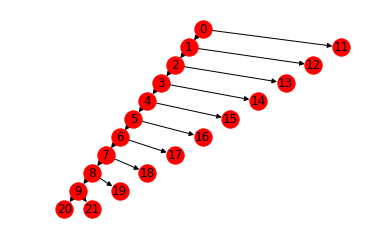

In [10]:
nice_tree_plot(g)

In [11]:
R = compute_combo_tensor_pam(g)
C = Aho.get_ratio_matrix(R)

In [12]:
g = nx.DiGraph([
    (i,i+1) for i in range(10)
])
g.graph["root"] = 0

R = compute_combo_tensor(g)
C = Aho.get_ratio_matrix(R)

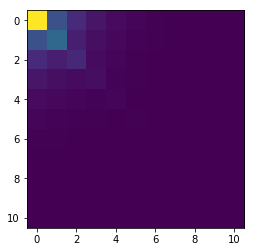

In [13]:
plt.imshow(R);

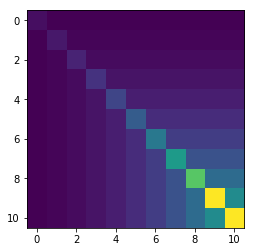

In [14]:
plt.imshow(C);

In [15]:
u = unique_off_diagonal(C)
u, np.diff(u)

(array([0.66666667, 0.88888889, 1.18518519, 1.58024691, 2.10699588,
        2.80932785, 3.74577046, 4.99436062, 6.65914749, 8.87886332]),
 array([0.22222222, 0.2962963 , 0.39506173, 0.52674897, 0.70233196,
        0.93644262, 1.24859015, 1.66478687, 2.21971583]))

In [16]:
np.array([2/3 * (4/3) ** i for i in range(10)])

array([0.66666667, 0.88888889, 1.18518519, 1.58024691, 2.10699588,
       2.80932785, 3.74577046, 4.99436062, 6.65914749, 8.87886332])

In [17]:
tree = Aho.extract(R + np.random.uniform(0, 1e-10, size=R.shape), threshold=(1/2)*(2/9), apply_ratio=True)

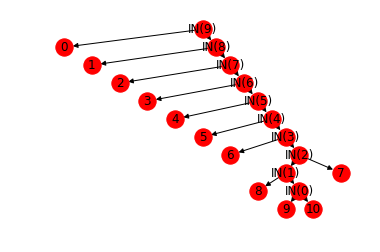

In [18]:
nice_tree_plot(tree)

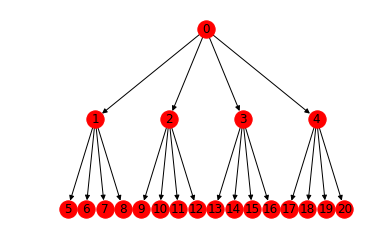

In [19]:
# g = nx.DiGraph([
#     (0,1),(0,2),(0,3),
#     (1,4),(1,5),(1,6),
#     (4,7),(4,8),(4,9),
# ]); g.graph["root"] = 0
#g = example_graphs.make_tree(branching_factors = [5,5])
g = example_graphs.make_tree(branching_factors = [4,4])
#g = example_graphs.make_tree(branching_factors = [3,3,3])
#g = example_graphs.make_tree(branching_factors = [2,2,2,2,2])
nice_tree_plot(g)

In [20]:
R, lp = compute_combo_tensor_pam(g, alpha=1, return_leaf_paths=True)
C = Aho.get_ratio_matrix(R)

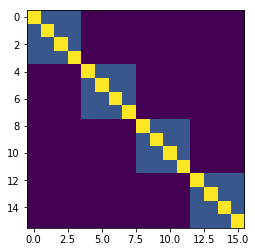

In [21]:
plt.imshow(C);

In [22]:
u = unique_off_diagonal(C)
print(u)
print(np.diff(u))
print(np.min(np.diff(u)))

[0.8  1.28]
[0.48]
0.48


In [23]:
noise_magnitude = 1e-10
noise = np.random.uniform(0, noise_magnitude, size = R.shape)
tree = Aho.extract(R + noise, threshold=(1/2)*(3/8), apply_ratio=True)

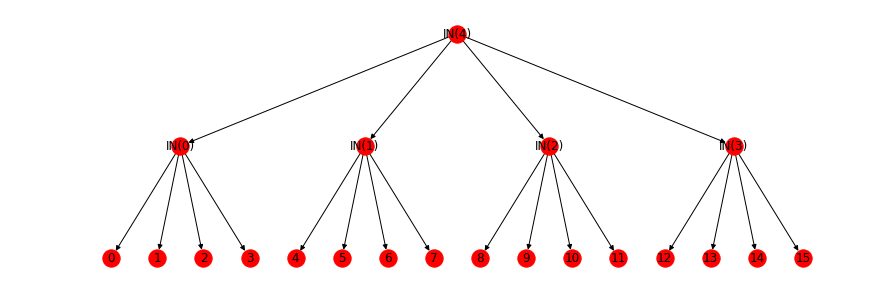

In [24]:
fig, ax = plt.subplots(figsize=(15,5))
nice_tree_plot(tree, ax=ax)

In [25]:
lp

[[0, 1, 5],
 [0, 1, 6],
 [0, 1, 7],
 [0, 1, 8],
 [0, 2, 9],
 [0, 2, 10],
 [0, 2, 11],
 [0, 2, 12],
 [0, 3, 13],
 [0, 3, 14],
 [0, 3, 15],
 [0, 3, 16],
 [0, 4, 17],
 [0, 4, 18],
 [0, 4, 19],
 [0, 4, 20]]

## Analyze minimum differences in $C_{ij}$ for symmetric trees

In [26]:
#sp.init_printing()

In [27]:
from IPython.display import display, Math

In [28]:
def display_math(x):
    display(Math(sp.latex(x)))

In [29]:
m, a, e, r, t = sp.S("m, a, epsilon, rho, t")

In [30]:
min_diff_expr = m*(m-1)*a / (1+m*a)**2
display_math(min_diff_expr)

<IPython.core.display.Math object>

In [31]:
display_math(sp.numer(min_diff_expr.diff(m).simplify()).simplify())

<IPython.core.display.Math object>

In [32]:
display_math(sp.numer(min_diff_expr.diff(a).simplify()).simplify())

<IPython.core.display.Math object>

In [33]:
display_math( min_diff_expr.subs([(m, 2)]) )

<IPython.core.display.Math object>

In [34]:
min_diff_func = sp.lambdify([m,a], min_diff_expr)

In [35]:
m_ = np.linspace(2, 5, 100)
a_ = np.linspace(1e-4, 10, 100)
mgrid, agrid = np.meshgrid(m_, a_)
delta = min_diff_func(mgrid, agrid)

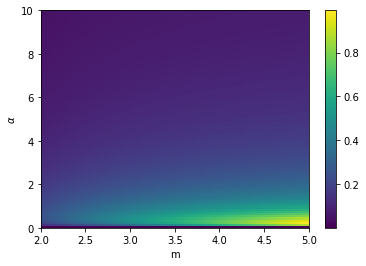

In [36]:
fig, ax = plt.subplots()
mesh = ax.pcolormesh(mgrid, agrid, delta)
plt.colorbar(mesh)
ax.set_xlabel("m")
ax.set_ylabel("$\\alpha$")
None

In [37]:
idx = np.unravel_index(delta.argmin(), delta.shape)
mgrid[idx], agrid[idx]

(2.0, 0.0001)

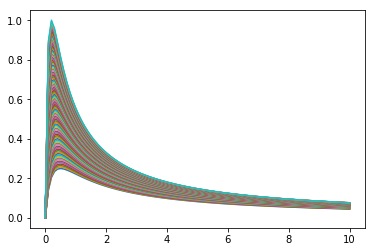

In [38]:
plt.plot(a_, delta);

In [39]:
def custom_sqrt(x):
    result = np.nan * np.ones_like(x)
    idx = np.where(x >= 0)
    result[idx] = np.sqrt(x[idx])
    return result

In [40]:
# Find range of alphas for which Delta_{min} will be > epsilon/rho
sols = sp.solve(sp.Eq(min_diff_expr.subs({m:2}), e/r), a)
sols = [s.expand() for s in sols]
display_math([sp.Eq(a, s) for s in sols])

<IPython.core.display.Math object>

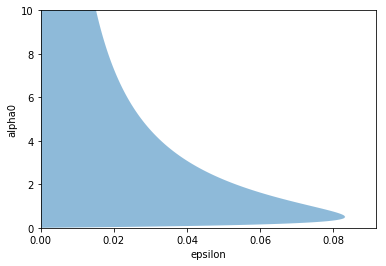

In [41]:
rho = 1/3
eps = np.linspace(1e-5, rho/4, 300)
alpha_low  = sp.lambdify([e,r], sols[0])(eps, rho)
alpha_high = sp.lambdify([e,r], sols[1])(eps, rho)
fig, ax = plt.subplots()
#ax.set_yscale('log')
ax.set_ylim(0, 10)
ax.fill_between(eps, alpha_low, alpha_high, alpha=0.5)
#ax.axhline(y=1/2, linestyle=':', color='k')
#ax.axvline(x=rho/4, linestyle=':', color='k')
ax.set_xlim(0, np.max(eps)*1.1)
ax.set_xlabel("epsilon")
ax.set_ylabel("alpha0")
None

In [42]:
sp.lambdify([r,e], sols[0])(1/3, 1/100)

0.015973733627616227

In [43]:
# Note: low range of alphas is inversely proportional to high range of alphas
(sols[0] * sols[1]).simplify()

1/4

In [44]:
# Find the maximum value of epsilon for which the range of alpha values is non-empty
w1, w2, w3 = sp.Wild("w1"), sp.Wild("w2"), sp.Wild("w3")
inside_sqrt = sols[0].match(w1+w2*sp.sqrt(w3))[w3]
eqn = sp.Eq(inside_sqrt, 0)
display_math(eqn)
eps_max = sp.solve(eqn, e)[0]
display_math(sp.Eq(e,eps_max))
print(eps_max.evalf(subs={r:rho}))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.0833333333333333


In [45]:
# At the maximum value of epsilon, alpha can take on only a single value
display_math(sp.Eq(a, sols[0].subs({e: eps_max})))

<IPython.core.display.Math object>

In [46]:
# Find the values of epsilon where alpha_low = 1/t or alpha_high = t (use min of these)
sols_eps = [
    sp.solve(x - y, e)[0].factor()
    for x, y in zip(sols, [1/t, t])
]
display_math([sp.Eq(e, s) for s in sols_eps])

<IPython.core.display.Math object>

In [47]:
zzz = [s.subs({r:rho, t:100}) for s in sols_eps]
print(zzz)
print(np.min(zzz))

[0.00640779187491990, 0.00165012417184393]
0.00165012417184393


In [48]:
# Find *approximate* value of epsilon that will include t and 1/t
# (Specifically, find value of epsilon at which midpoint of alpha_low and alpha_high equals t/2)
eqn = sp.Eq((sols[0] + sols[1])/2, t/2)
display_math(eqn)
eps_star = sp.solve(eqn, e)[0]
display_math(sp.Eq(e,eps_star))
print(eps_star.evalf(subs={r:rho, t:100}))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

0.00165016501650165


## Experiments with non-symmetric trees

In [49]:
branch_left = [2,5,7]
branch_right = [5,6]
extra_first_layer = 1

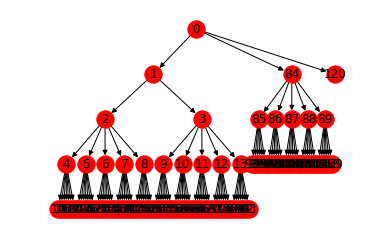

In [50]:
g = nx.DiGraph()
g.add_node(0)
g.graph["root"] = 0
g_left = example_graphs.make_tree(branch_left)
g_right = example_graphs.make_tree(branch_right)
node_offset = 1
g.add_edge(0, node_offset)
for x, y in g_left.edges():
    g.add_edge(x + node_offset, y + node_offset)
node_offset += g_left.number_of_nodes()
g.add_edge(0, node_offset)
for x, y in g_right.edges():
    g.add_edge(x + node_offset, y + node_offset)
node_offset += g_right.number_of_nodes()
for i in range(extra_first_layer):
    g.add_edge(0, i + node_offset)

nice_tree_plot(g)

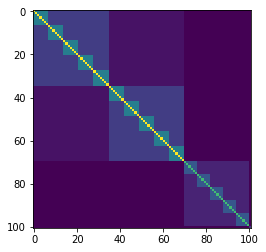

In [51]:
R, lp = compute_combo_tensor_pam(g, return_leaf_paths=True)
C = Aho.get_ratio_matrix(R)
plt.imshow(C);

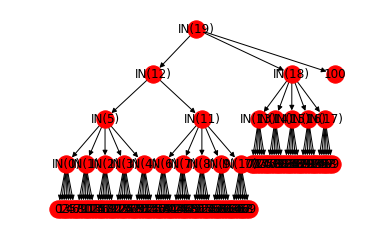

In [52]:
tree = Aho.extract(R, threshold = 1/9)
nice_tree_plot(tree)

In [53]:
# Compute minimum diff between off-diagonal elements
np.min(np.diff(unique_off_diagonal(C)))

0.25

In [54]:
def min_off_diagonal_diff_by_column(x, round_decimals = 10):
    # TODO: also return location of min difference (in the form (a,b,c) --> C_{ab} - C_{ac})
    result = []
    for i in range(x.shape[1]):
        indices = np.arange(x.shape[0])
        indices = np.concatenate([indices[:i], indices[i+1:]])
        col = x[indices, i].round(round_decimals)
        col_unique = np.unique(col)
        if len(col_unique) > 1:
            result.append(np.min(np.diff(col_unique)))
    if len(result) == 0:
        return np.nan
    return np.min(result)

In [55]:
def min_off_diagonal_diff_from_triplets(x, round_decimals = 10, return_indices = False):
    x = x.copy().round(round_decimals)
    n = x.shape[0]
    indices = []
    diffs = []
    for i in range(n):
        for j in range(i+1,n):
            for k in range(n):
                if k == i or k == j:
                    continue
                d = x[i,j] - x[i,k]
                if d > 0:  # Note: ignore negative differences to avoid double-counting
                    indices.append((i,j,k))
                    diffs.append(d)
    i_best = np.argmin(diffs)
    if return_indices:
        intermed = np.where(np.array(diffs) == diffs[i_best])[0]
        best_coords = [indices[i] for i in intermed]
        return diffs[i_best], best_coords
    else:
        return diffs[i_best]

In [56]:
# Alternate: use per-column stats, since that's what matters for triplet constraints
# NOTE: Yields wider margins than 2/9
# Hypothesis: always above the 2*alpha / (2*alpha + 1)^2 case corresponding to a binary tree?
min_off_diagonal_diff_by_column(C)

0.25

In [57]:
%%time
min_off_diagonal_diff_from_triplets(C)

CPU times: user 494 ms, sys: 20.9 ms, total: 515 ms
Wall time: 617 ms


0.25

## Constant alphas (for comparison to variable alphas below)

In [58]:
g = example_graphs.make_tree([2,2])

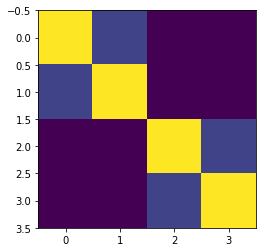

In [59]:
R, lp = compute_combo_tensor_pam(g, return_leaf_paths=True)
C = Aho.get_ratio_matrix(R)
plt.imshow(C);

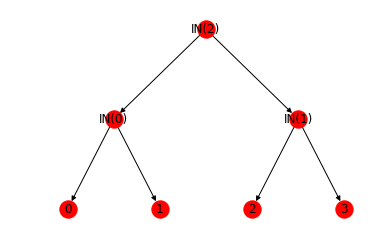

In [60]:
tree = Aho.extract(R, threshold = 1/9)
nice_tree_plot(tree)

In [61]:
min_off_diagonal_diff_by_column(C)

0.22222222219999999

In [62]:
min_off_diagonal_diff_from_triplets(C, return_indices = True)

(0.22222222219999999, [(0, 1, 2), (0, 1, 3), (2, 3, 0), (2, 3, 1)])

## Variable alphas

In [63]:
g = example_graphs.make_tree([2,2])

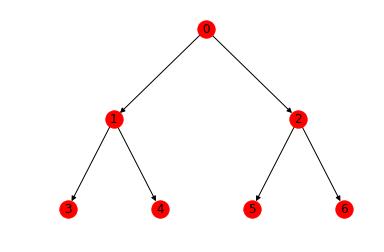

In [64]:
nice_tree_plot(g)

In [65]:
x, y = 0.5, 1.5
alpha = {
    0: np.array([x,y]),
    1: np.array([y,y]),
    2: np.array([y,x]),
    3: np.array([x,x]),
}

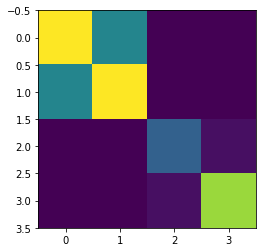

In [66]:
R, lp = compute_combo_tensor_pam(g, alpha=alpha, return_leaf_paths=True)
C = Aho.get_ratio_matrix(R)
plt.imshow(C);

In [67]:
niceprint(C)

[[2.5000 1.5000 0.6667 0.6667]
 [1.5000 2.5000 0.6667 0.6667]
 [0.6667 0.6667 1.2346 0.7407]
 [0.6667 0.6667 0.7407 2.2222]]


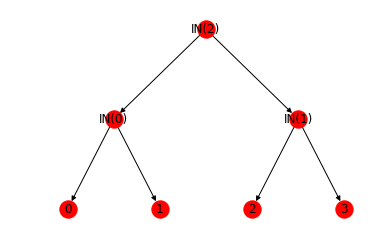

In [68]:
tree = Aho.extract(R, threshold = 1e-4)
nice_tree_plot(tree)

In [69]:
min_off_diagonal_diff_by_column(C)

0.07407407399999999

In [70]:
min_off_diagonal_diff_from_triplets(C, return_indices = True)

(0.07407407399999999, [(2, 3, 0), (2, 3, 1)])

In [71]:
min_diff_expr.evalf(subs={sp.S("m"):2, sp.S("a"):x}), \
min_diff_expr.evalf(subs={sp.S("m"):2, sp.S("a"):y})

(0.250000000000000, 0.187500000000000)

**Another variation**:  Alpha is constant within each node, but can vary across nodes.

The results below seem to indicate that the minimum nonzero difference $|C_{ij} - C_{ik}|$ depends on how close we are to violating the "limited sparsity property" (sum of node's outgoing alphas > incoming alpha corresponding to parent-child edge).

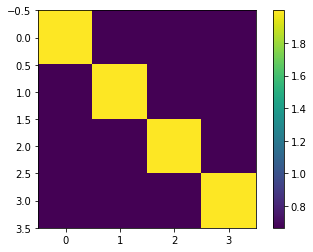

In [72]:
R, lp = compute_combo_tensor_pam(g, alpha={
    0: 1 * np.ones(2),
#     1: 50 * np.ones(2),
#     2: 50 * np.ones(2),
    1: 0.501 * np.ones(2),
    2: 0.501 * np.ones(2),
}, return_leaf_paths=True)
C = Aho.get_ratio_matrix(R)
plt.imshow(C);
plt.colorbar();

In [73]:
niceprint(C, precision=15)

[[1.999333999334000 0.667332667332667 0.666666666666667 0.666666666666667]
 [0.667332667332667 1.999333999334000 0.666666666666667 0.666666666666667]
 [0.666666666666667 0.666666666666667 1.999333999333999 0.667332667332667]
 [0.666666666666667 0.666666666666667 0.667332667332667 1.999333999334000]]


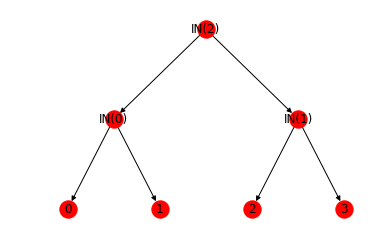

In [74]:
tree = Aho.extract(R, threshold = 1e-6)
nice_tree_plot(tree)

In [75]:
min_diff, triplets = min_off_diagonal_diff_from_triplets(C, return_indices = True)
min_diff, triplets

(0.0006660005999999941, [(0, 1, 2), (0, 1, 3), (2, 3, 0), (2, 3, 1)])

In [76]:
import matplotlib as mpl

In [77]:
def highlight_triplet_constraints(triplets, ax = None):
    if ax is None:
        ax = plt.gca()
    for i, j, k in triplets:
        ax.add_patch(mpl.patches.Rectangle((i-0.5, j-0.5), 1.0, 1.0, edgecolor='orange', fill=False))
        ax.add_patch(mpl.patches.Rectangle((i-0.5, k-0.5), 1.0, 1.0, edgecolor='green', fill=False))

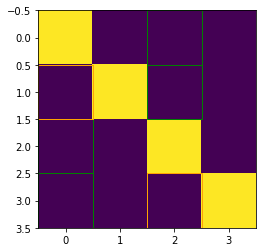

In [78]:
plt.imshow(C)
highlight_triplet_constraints(triplets = triplets)